Building prefix dict from the default dictionary ...                (0 + 4) / 4]
Loading model from cache /tmp/jieba.cache
Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Building prefix dict from the default dictionary ...
Loading model from cache /tmp/jieba.cache
Loading model cost 1.860 seconds.
Prefix dict has been built successfully.
Loading model cost 1.860 seconds.
Prefix dict has been built successfully.
Loading model cost 1.856 seconds.
Prefix dict has been built successfully.
Loading model cost 1.875 seconds.
Prefix dict has been built successfully.


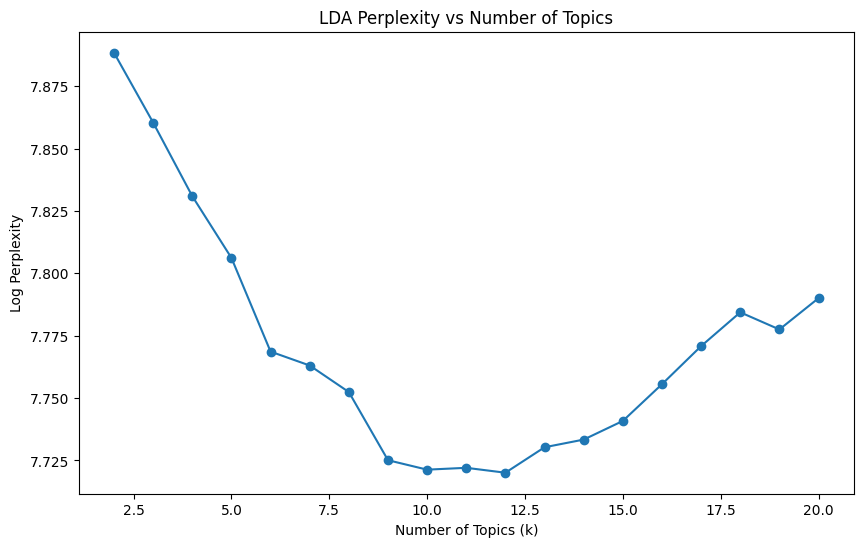

最佳主題數量: 12


主題 0:
  病毒: 0.029814430808666182
  疫情: 0.014278029993481158
  口罩: 0.01339777982933668
  新冠: 0.011407157533227545
  感染: 0.010710965350891553
  防疫: 0.009226262829000149
  肺炎: 0.00548139809439189
  風險: 0.003930527217797297
  症狀: 0.0038093113144657413
  接觸: 0.0037604727763749144
主題 1:
  疫苗: 0.06299867514083846
  接種: 0.01559213249752427
  感染: 0.010432221649153944
  新冠: 0.009747865344378985
  病毒: 0.008699205560457807
  免疫: 0.007330756538743269
  美國: 0.006878942335873849
  死亡: 0.005033759375479481
  疾病: 0.004496709094611472
  抗體: 0.0044726173024838166
主題 2:
  公告: 0.009186759070266632
  教育: 0.007729561079021464
  教育部: 0.006435987226416927
  招募: 0.005641663731110248
  民防: 0.005602282598897615
  學校: 0.005279424133027872
  除役: 0.005031731384272681
  身分: 0.004559410160124852
  公文: 0.0043219735867457065
  拜登: 0.004105449274230852
主題 3:
  投票: 0.016528538195020412
  聯合國: 0.011264662822088422
  烏克蘭: 0.008387531569975298
  公投: 0.006711697244422758
  同意: 0.006293337433045268
  英國: 0.006214810371098215
 

/tmp/ipykernel_3316/2500652140.py:127: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_texts = doc_topics_pd.groupby("dominant_topic").apply(


每個主題的 Top Texts:
主題 0:
  文本: 健康, 分數: 0.9990026176461465
  文本: 生活, 分數: 0.9989967955085381
  文本: 健康, 分數: 0.9986042640549859
  文本: 健康, 分數: 0.9985928474389839
  文本: 健康, 分數: 0.9984674208432568
主題 1:
  文本: 國際, 分數: 0.9993172082256255
  文本: 健康, 分數: 0.9992746029327817
  文本: 健康, 分數: 0.9992538371982008
  文本: 健康, 分數: 0.9991952025796433
  文本: 健康, 分數: 0.9991456497320438
主題 2:
  文本: 國際, 分數: 0.9970152855216754
  文本: 政治與政策, 分數: 0.9966708240194161
  文本: 政治與政策, 分數: 0.99575667286199
  文本: 政治與政策, 分數: 0.9945893110158397
  文本: 政治與政策, 分數: 0.9440164909877561
主題 3:
  文本: 政治與政策, 分數: 0.9987093612702338
  文本: 政治與政策, 分數: 0.9965543608313314
  文本: 政治與政策, 分數: 0.9959772173281886
  文本: 生活, 分數: 0.9956754569956032
  文本: 生活, 分數: 0.985523906435106
主題 4:
  文本: 政治與政策, 分數: 0.999245559150275
  文本: 政治與政策, 分數: 0.9991138662446158
  文本: 政治與政策, 分數: 0.9989663450716111
  文本: 政治與政策, 分數: 0.9988491876857972
  文本: 政治與政策, 分數: 0.9987136778308661
主題 5:
  文本: 健康, 分數: 0.9995107387225025
  文本: 健康, 分數: 0.9992548476064568
  文本: 健康, 分數: 0.99923220

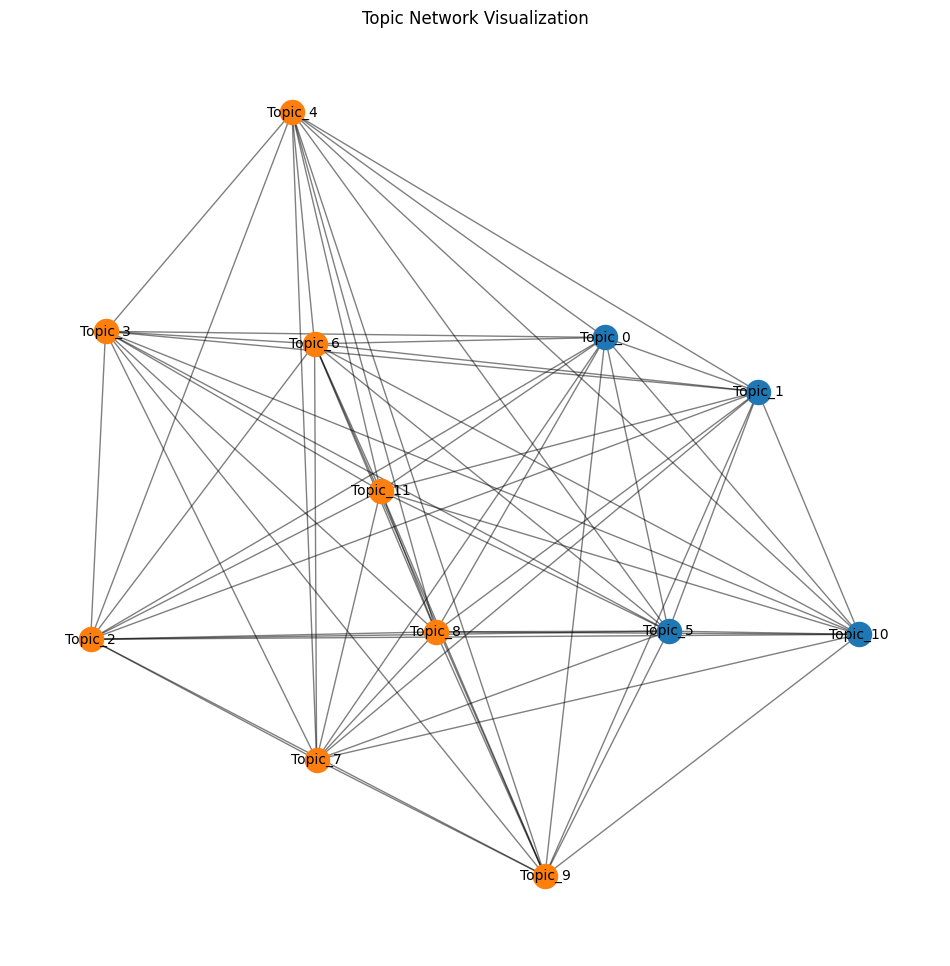

In [2]:
import os
import jieba
import re
from pyspark.sql import SparkSession
from pyspark.ml.feature import CountVectorizer
from pyspark.ml.clustering import LDA
from pyspark.sql.functions import udf
from pyspark.sql.types import ArrayType, StringType
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity
import networkx as nx
from community import community_louvain
import matplotlib.colors as mcolors

# 初始化 SparkSession
spark = SparkSession.builder \
    .appName("PySpark LDA Analysis with Gephi Export") \
    .getOrCreate()

# 自定義分詞函數並去除標點符號和非中文字符
def jieba_tokenize(text):
    text = re.sub(r"[^\u4e00-\u9fa5]", "", text)  # 只保留中文字符
    return list(jieba.cut(text))

# 讀取 CSV 文件
csv_path = "/home/rrrrryeedie/final_sorted_output.csv"
data = spark.read.csv(csv_path, header=True, inferSchema=True)

# 篩選需要的欄位，例如 'title' 和 'body'
data = data.select('title', 'body').dropna()

# 停用詞處理（自定義更多停用詞）
stopwords = set([
    '的', '了', '在', '是', '和', '也', '有', '我', '他', '她', '它', '就', '都', '很', '而', '但', '不', '這', '那',
    '與', '為', '個', '被', '與', '對', '和', '或', '能', '要', '更', '來', '看', '和', '而且', '是', '你', '我們', '她們',
    '會', '查核', '說', '表示', '於', '打', '影片', '網傳', '月', '年',
    '傳言', '年月日', '照片', '指出', '可能', '等', '可以', '吃', '因此', '所', '日', '製', '後', '目前', '報導',
    '到', '使用', '畫面', '事件', '發布', '人', '中心', '報告', '發生', '造成', '社群', '平台', '規定', '內容', '文章', '圖', '傳', '事實', '是否',
    '之', '以上', '流傳', '上', '及', '錯誤', '從', '若', '檢視', '更新版', '近期', '該', '一', '二','圖片', '網站' , '如果', '不會','可','讓','隨時','更新',
    '找到','出現', '原始', '背景','誤訊息', '沒', '沒有', '多', '影響','以','長','錯','再','用','中','不是','含有','隻','日期','報告將','因為', 
    '較', '部分', '相關', '並非', '歲', '反應', '已','宣稱','處理', '流傳訊息', '反','均','建議','者','時','資料','效果','快','顯示','不要','拍','元',
    '不同','未','至', '指稱','進行','由','稱','文字','比','搭配','無法','需要','增加','訊息','一網','通過', '含量', '擷圖', '字', '事故','喝',
    '軍','研究', '高','根據','才','應','編號','方式','提醒','功能','文件','一段','戴','篩','請','罰','管理','鈣','新','鍰','黃','三','申請',
    '結果','第條', '陳','處','此','蔡','英文','書', '版本','不能','狀況','相同','提供','活動','時間','搜','貼','無關','措施','跟','導致','新聞',
    '媒體','台灣','捲','蛇','標準','許量','一般','專家','趙', '傳言為', '提及', '透過', '台','控制','無','安全','民眾','帳號','軟體', '沖','來源',
    '檢索','曾', '直接','記者','員',  '內', '採訪', '去', '系統','工作','就是','擷','要求','地點','組織','通知','網頁', '其', '網路', '影像', '爭議點',
    '收到', '人員','任何','攝','分秒','秒','大量','植物', '片段','資訊','這是','為何','其他','以及','公布','結論','現場','蔔','向','人民','公民','看到','把',
    '另','真的','嗎','圖圖','發現','今年','利用','查證','當時','大利','做','一張','粉', '紓','公司','真實', '好', '特別', '問題','防部','並',
    '人數','標題','宣布','開始','一個','地','道'
])

def process_text(text):
    if text is None:
        return []
    words = jieba.cut(re.sub(r"[^\u4e00-\u9fa5]", "", text))
    return [word for word in words if word not in stopwords]

# 定義分詞與去停用詞的 UDF
process_text_udf = udf(process_text, ArrayType(StringType()))
data = data.withColumn("filtered_words", process_text_udf(data["body"]))

# 設置 CountVectorizer
vectorizer = CountVectorizer(inputCol="filtered_words", outputCol="features", vocabSize=5000, minDF=5)
vectorized_model = vectorizer.fit(data)
vectorized_data = vectorized_model.transform(data)

# 計算困惑度並選擇最佳主題數量
k_values = range(2, 21)  # 在此改變困惑度的選取範圍 要改參數的畫需要額外+1
perplexities = []
for k in k_values:
    lda = LDA(k=k, maxIter=10, featuresCol="features")
    model = lda.fit(vectorized_data)
    log_perplexity = model.logPerplexity(vectorized_data)
    perplexities.append(log_perplexity)

# 繪製困惑度曲線
plt.figure(figsize=(10, 6))
plt.plot(k_values, perplexities, marker="o")
plt.title("LDA Perplexity vs Number of Topics")
plt.xlabel("Number of Topics (k)")
plt.ylabel("Log Perplexity")
plt.show()

# 選擇困惑度最低的主題數量
optimal_k = k_values[np.argmin(perplexities)]
print(f"最佳主題數量: {optimal_k}")

# 使用最佳主題數量進行 LDA 分析
lda = LDA(k=optimal_k, maxIter=10, featuresCol="features")
lda_model = lda.fit(vectorized_data)

# 取得主題描述
topics = lda_model.describeTopics(10)
topics_pd = topics.toPandas()

# 提取關鍵詞對應的字詞
vocab_list = vectorized_model.vocabulary
topics_pd["terms"] = topics_pd["termIndices"].apply(lambda indices: [vocab_list[idx] for idx in indices])

# 新增打印關鍵詞和權重的程式碼
for i, row in topics_pd.iterrows():
    print(f"主題 {i}:")
    for term, weight in zip(row["terms"], row["termWeights"]):
        print(f"  {term}: {weight}")

# 將文檔主題分佈轉為 NumPy 矩陣
doc_topics = lda_model.transform(vectorized_data)
doc_topics_pd = doc_topics.select("title", "topicDistribution").toPandas()
doc_topics_pd["topicDistribution"] = doc_topics_pd["topicDistribution"].apply(
    lambda x: np.array(x, dtype=np.float64)
)

# 找到每篇文檔的主要主題
doc_topic_matrix = np.array(doc_topics_pd["topicDistribution"].tolist())
doc_topics_pd["dominant_topic"] = np.argmax(doc_topic_matrix, axis=1)

# 新增 dominant_score 欄位，提取每篇文檔的主要主題分數
doc_topics_pd["dominant_score"] = doc_topics_pd.apply(
    lambda row: row["topicDistribution"][row["dominant_topic"]], axis=1
)

# 按主題分組並提取前 5 篇文本
def extract_top_texts(doc_topics_pd):
    try:
        top_texts = doc_topics_pd.groupby("dominant_topic").apply(
            lambda df: df.sort_values(by="dominant_score", ascending=False).head(5) # 顯示最重要的
        )
        print("每個主題的 Top Texts:")
        for topic, group in top_texts.groupby(level=0):
            print(f"主題 {topic}:")
            for _, row in group.iterrows():
                print(f"  文本: {row['title']}, 分數: {row['dominant_score']}")
    except Exception as e:
        print(f"提取 Top Texts 時出現錯誤: {e}")

extract_top_texts(doc_topics_pd)

# 確保 topic_names 的長度與矩陣維度一致
topic_names = [f"Topic_{i}" for i in range(doc_topic_matrix.shape[1])]

# 修正後的網絡圖生成函數
def create_topic_network(theta_matrix, topic_names, weight_threshold=0.1):
    """
    創建主題網絡圖
    :param theta_matrix: 主題分佈矩陣 (文檔 x 主題)
    :param topic_names: 主題名稱列表
    :param weight_threshold: 權重閾值，僅顯示大於此閾值的邊
    :return: NetworkX Graph
    """
    # 檢查 theta_matrix 的維度和 topic_names 是否匹配
    if len(topic_names) != theta_matrix.shape[1]:
        raise ValueError("topic_names 的長度與主題矩陣的列數不匹配！")

    # 計算主題間的餘弦相似度
    cosine_sim = cosine_similarity(theta_matrix.T)  # 矩陣需轉置
    G = nx.Graph()

    # 創建圖結構
    for i in range(len(cosine_sim)):
        for j in range(i + 1, len(cosine_sim)):
            if cosine_sim[i, j] > weight_threshold:  # 設定權重閾值
                print(f"配對: {topic_names[i]} - {topic_names[j]}, 權重: {cosine_sim[i, j]}")
                G.add_edge(topic_names[i], topic_names[j], weight=cosine_sim[i, j])

    # 使用 Louvain 方法進行社群檢測
    partition = community_louvain.best_partition(G)
    nx.set_node_attributes(G, partition, 'community')
    return G

# 修正後的網絡視覺化函數
def visualize_network(G):
    """
    視覺化主題網絡圖，基於社群使用不同顏色
    :param G: NetworkX Graph
    """
    pos = nx.spring_layout(G, seed=42)  # 固定隨機種子，確保佈局一致
    plt.figure(figsize=(12, 12))

    communities = nx.get_node_attributes(G, 'community')
    unique_communities = set(communities.values())
    color_map = list(mcolors.TABLEAU_COLORS.values())

    for community in unique_communities:
        nodes = [node for node in G.nodes if communities[node] == community]
        nx.draw_networkx_nodes(G, pos, nodelist=nodes, node_size=300, 
                               node_color=color_map[community % len(color_map)])

    nx.draw_networkx_edges(G, pos, alpha=0.5)
    nx.draw_networkx_labels(G, pos, font_size=10)
    plt.title("Topic Network Visualization")
    plt.axis('off')
    plt.show()

# 使用修正後的權重閾值生成網絡圖並視覺化
try:
    weight_threshold = 0.0001  # 需大於此權重閥值 才會顯示連線
    network = create_topic_network(doc_topic_matrix, topic_names, weight_threshold=weight_threshold)
    visualize_network(network)
except Exception as e:
    print(f"出現錯誤: {e}")
